# Overview analysis from Madrid

## Extract the description.

In [1]:
import json
import pandas as pd
import os

#Open the madrid coworkings csv
path = '/workspaces/Coworking/src/results/Madrid_coworking_spaces.json'

with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)

df = pd.json_normalize(data)

df_overview = df[['description']]

In [2]:
df_overview.head()

,description
0,Overview of Regus - Madrid Financial District ...
1,"Overview of Regus - LAS ROZAS, Las Rozas\nThe ..."
2,"Overview of Regus - Madrid, Ortega y Gasset\nT..."
3,Overview of WeWork Eloy Gonzalo 27\n***OPENING...
4,Overview of Regus - Madrid Pinar-Salamanca Dis...


## Show the important words from the descriptions.

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        word  frequency
1261    busi        202
6729    meet        201
6375  madrid        190
7578   offic        156
514     area        141
9586  servic        135
9274    room        131
6153   locat        131
7491   offer        123
1577   centr        118


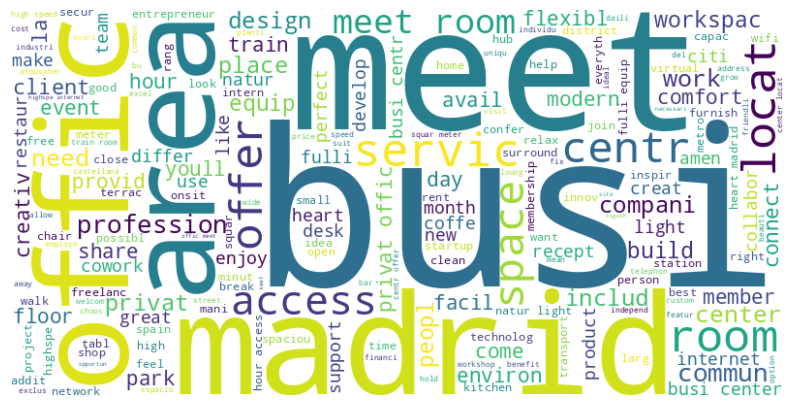

In [3]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download the NLTK stopwords if not already available
nltk.download('stopwords')

# Preprocessing the text and removing unwanted terms
def preprocess_text(text, custom_stopwords):
    # Convert to lowercase
    text = text.lower()
    
    # Remove unwanted terms/phrases like 'overview', 'regus madrid', 'regus'
    text = re.sub(r'\boverview\b|\bregus madrid\b|\bregus\b', '', text)  # \b for word boundaries
    
    # Remove special characters, digits and extra spaces (leave only alphabets and spaces)
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize the text into words
    words = text.split()
    
    # Remove stopwords and perform stemming
    ps = PorterStemmer()
    words = [ps.stem(word) for word in words if word not in custom_stopwords]
    
    # Join the words back into a single string
    return ' '.join(words)

# Load your JSON data
with open(path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Normalize the JSON to a DataFrame
df = pd.json_normalize(data)

# Define custom stopwords (add any words you consider irrelevant)
custom_stopwords = set(stopwords.words('english')) | {'space', 'office', 'work', 'coworking', 'room'}

# Apply preprocessing to each row in the 'overview' column
df['overview_cleaned'] = df['description'].apply(lambda x: preprocess_text(x, custom_stopwords))

# Step 2: Common Words Analysis
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))  # (1, 2) for unigrams and bigrams
X_text = vectorizer.fit_transform(df['overview_cleaned'])

# Get the most common words/bigrams
word_freq = X_text.toarray().sum(axis=0)
common_words = vectorizer.get_feature_names_out()

# Create a DataFrame to display the common words and their frequencies
word_freq_df = pd.DataFrame(zip(common_words, word_freq), columns=['word', 'frequency'])
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Print the top 10 most common words/bigrams
print(word_freq_df.head(10))

# Step 3: Visualize the Common Words (Word Cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(common_words, word_freq)))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


space              285
coworking          214
madrid             192
overview           185
business           185
offices            156
meeting            153
work               147
office             136
rooms              131
spaces             112
centre             107
working             92
meeting rooms       92
area                87
access              86
services            84
located             80
private             78
coworking space     72
dtype: int64


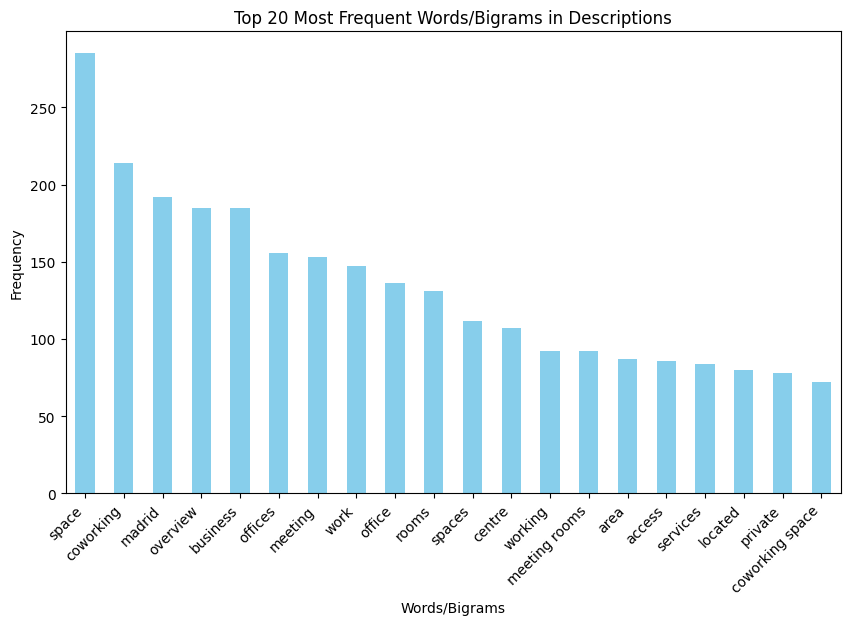

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Use CountVectorizer to extract word and bigram frequencies from the description
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_features=50)  # max_features to limit output
X = vectorizer.fit_transform(df['description'])  # Apply CountVectorizer to the 'description' column

# Convert the result into a dataframe for easier handling
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the frequencies of each word/bigram
word_freq_sum = word_freq.sum().sort_values(ascending=False)

# Display the top 20 most frequent words and bigrams
top_words = word_freq_sum.head(20)
print(top_words)

# Visualize the frequencies of the top 20 words/bigrams
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words/Bigrams in Descriptions')
plt.xlabel('Words/Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


## Extract the price.

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("/workspaces/Coworking/src/results/Madrid_coworking_spaces.csv")

df.head()

,url,name,address,description,amenities,price
0,https://www.coworker.com/spain/madrid/regus-ma...,Coworking Space: Regus - Madrid Financial Dist...,NaN,Overview of Regus - Madrid Financial District ...,NaN,Private Office\n from € 490\n/month
1,https://www.coworker.com/spain/madrid/regus-la...,"Coworking Space: Regus - LAS ROZAS, Las Rozas ...",NaN,"Overview of Regus - LAS ROZAS, Las Rozas\nThe ...",NaN,Private Office\n from € 189\n/month
2,https://www.coworker.com/spain/madrid/regus-ma...,"Coworking Space: Regus - Madrid, Ortega y Gass...",NaN,"Overview of Regus - Madrid, Ortega y Gasset\nT...",NaN,Private Office\n from € 315\n/month
3,https://www.coworker.com/spain/madrid/wework-e...,Coworking Space: WeWork Eloy Gonzalo 27 in Madrid,NaN,Overview of WeWork Eloy Gonzalo 27\n***OPENING...,NaN,Private Office\n from € 980\n/month
4,https://www.coworker.com/spain/madrid/regus-ma...,Coworking Space: Regus - Madrid Pinar-Salamanc...,NaN,Overview of Regus - Madrid Pinar-Salamanca Dis...,NaN,Private Office\n from € 225\n/month


In [6]:
import re

# Function to extract the price
def extract_price(text):
    if pd.isna(text):  # Handle missing values
        return None
    match = re.search(r'(\d+)', text)  # Extract the first number
    return int(match.group(1)) if match else None  # Convert to int if found

# Apply the function to the 'price' column
df['price_cleaned'] = df['price'].apply(extract_price)

# Display the results
print(df[['price', 'price_cleaned']])


                                   price  price_cleaned
0    Private Office\n from € 490\n/month          490.0
1    Private Office\n from € 189\n/month          189.0
2    Private Office\n from € 315\n/month          315.0
3    Private Office\n from € 980\n/month          980.0
4    Private Office\n from € 225\n/month          225.0
..                                   ...            ...
180    Private Office \nPrice on request            NaN
181    Private Office \nPrice on request            NaN
182    Private Office \nPrice on request            NaN
183    Private Office \nPrice on request            NaN
184                        1\n2\n3\n4\n5            1.0

[185 rows x 2 columns]


In [7]:
print(df['price_cleaned'].isna().sum())  # Count NaN values

14


In [8]:
median_price = df['price_cleaned'].median()
df['price_cleaned'].fillna(median_price, inplace=True)


/tmp/ipykernel_42660/1063067066.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_cleaned'].fillna(median_price, inplace=True)


In [9]:
df['price_cleaned'].describe()

count     185.000000
mean      301.443243
std       275.960454
min         1.000000
25%       150.000000
50%       250.000000
75%       350.000000
max      2000.000000
Name: price_cleaned, dtype: float64

## Merge price and description amenities to separate them in clusters.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
import pandas as pd
from collections import Counter
import nltk
import string

#Clean and scale the price data
scaler = StandardScaler()
X_price = scaler.fit_transform(df[['price_cleaned']])  # Assuming price_cleaned is already numeric

#Combine text (X_text) and price (X_price) features
# Convert X_text to a dense matrix and concatenate with the scaled price
X_combined = np.hstack((X_text.toarray(), X_price))

# 4. Reduce dimensionality using PCA
pca = PCA(n_components=50)  # Keep the first 50 components (adjust as needed)
X_reduced = pca.fit_transform(X_combined)


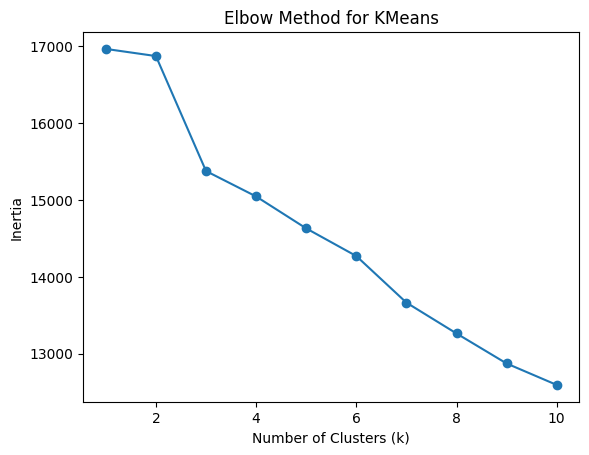

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Elbow Method to determine optimal number of clusters
inertia = []  # list to hold inertia values
k_range = range(1, 11)  # Trying k values from 1 to 10 (you can adjust this range)

# Loop through k values and compute the inertia (sum of squared distances to centroids)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)  # X_reduced is the reduced dimensionality feature set (after PCA)
    inertia.append(kmeans.inertia_)

# Plot inertia to visualize the "elbow"
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

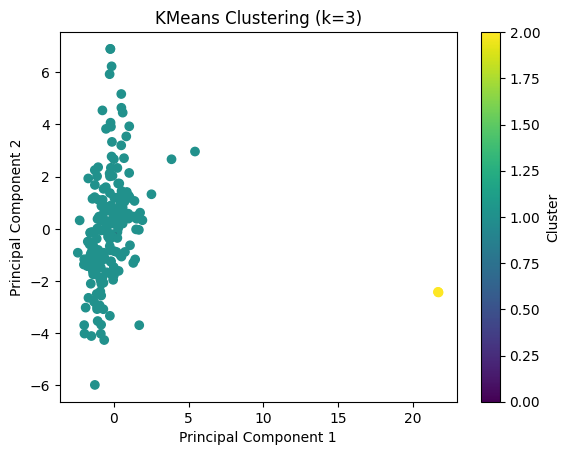

In [12]:
optimal_k = 3  # Replace with the value you find from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_reduced)  # Apply KMeans on the reduced features

# Step 3: Visualize the clusters using PCA (first two components)
pca = PCA(n_components=2)  # Reduce to two dimensions for visualization
X_pca = pca.fit_transform(X_reduced)  # Project the reduced data to 2D space

# Plot the clustering result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', marker='o')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

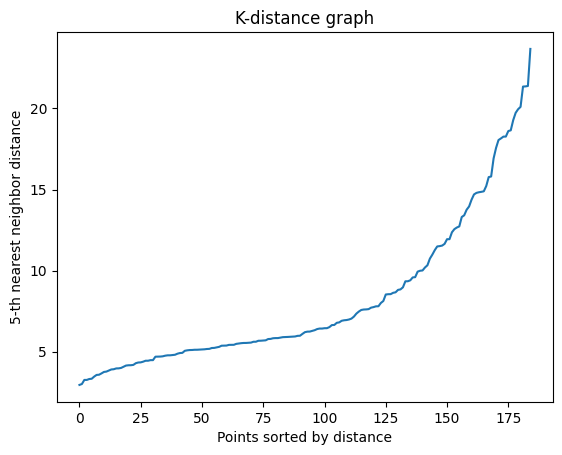

In [13]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Calculate the k-distance for each point (use k = min_samples for DBSCAN)
k = 5  # Set min_samples for DBSCAN
nbrs = NearestNeighbors(n_neighbors=k).fit(X_reduced)  # Use the reduced data (PCA)
distances, indices = nbrs.kneighbors(X_reduced)

# Sort distances to plot the k-distance graph
distances = np.sort(distances[:, k-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('K-distance graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-th nearest neighbor distance')
plt.show()


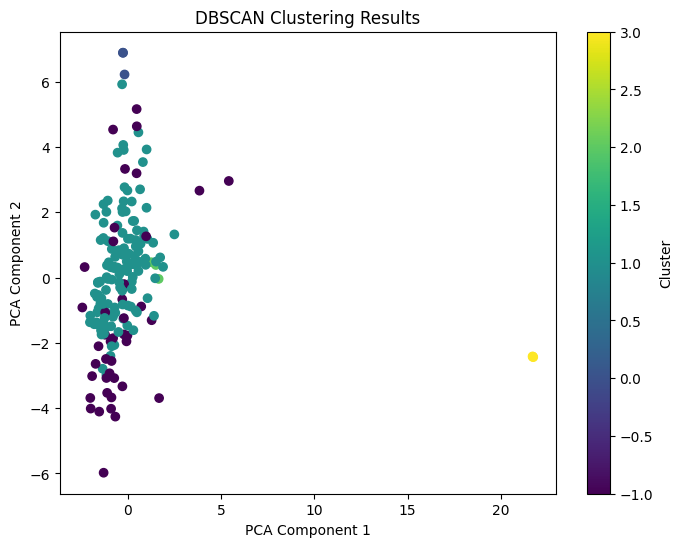

In [14]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=8, min_samples=3)  # Use the best eps and min_samples values found
dbscan_labels = dbscan.fit_predict(X_reduced)

# Add the DBSCAN labels back to the dataframe
df['dbscan_cluster'] = dbscan_labels

# Visualize DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [15]:
from sklearn.metrics import silhouette_score

# For DBSCAN, use the predicted labels for clustering (dbscan_labels)
# For KMeans, use the cluster labels (kmeans_labels)
score = silhouette_score(X_combined, kmeans_labels)  # Or use dbscan_labels
print(f"Silhouette Score: {score}")


Silhouette Score: 0.05299711125454895


In [16]:
from sklearn.metrics import silhouette_score

# For DBSCAN, use the predicted labels for clustering (dbscan_labels)
# For KMeans, use the cluster labels (kmeans_labels)
score = silhouette_score(X_combined, dbscan_labels)  # Or use dbscan_labels
print(f"Silhouette Score: {score}")


Silhouette Score: 0.050307278793335186


In [17]:
# For KMeans, you can check the inertia
inertia = kmeans.inertia_
print(f"Inertia: {inertia}")


Inertia: 15375.367251578395


## Include the rating and user rating count in the clustering.

### 